### Paola Della Foglia matr. 961014

# <span style="color:red"> Esercitazione numerica 4</span>

## <span style="color:blue"> Esercizio 4.1</span>
### Scopo
Lo scopo di questo esercizio è quello di aggiungere al codice di partenza, scaricato dal sito LSN Ariel di Dinamica Molecolare, la possibilità di far ripartire la simulazione non solo leggendo la configurazione spaziale iniziale di N particelle, ma anche quella vecchia ("old.0" , "old.final") e aggiungere un'opzione, in modo tale, da riscalare le velocità per ottenere la temperatura desiderata per lo stato solido, liquido e gassoso. 

### Compilazione
Per compilare il codice, salvato nella cartella <font face = "Courier"> ex04.1</font>, si usa, da shell unix, il comando <font face = "Courier"> `$make` </font> e si esegue con <font face = "Courier"> `$./MolDyn_NVE.exe` </font>. Si può decidere di continuare la simulazione dal punto precedente impostando icontinue=1 nel file <font face = "Courier"> input.dat </font> e riscalare le velocità impostando irestart=1.

### Equilibratura
All'inizio della simulazione generiamo velocità casuali che seguono una distribuzione uniforme che non è quella di Maxwell. Riscaliamo queste ultime per ottenere la temperatura desiderata: dopo alcuni steps, le collisioni tra particelle ridistribuiscono l'energia del sistema e le velocità assumono una distribuzione di Maxwell. Ciò porta la temperatura ad un valore più basso di quello di partenza. Per correggere questo problema possiamo procedere in due modi: 
1) Iniziare la simulazione da una temperatura più alta ( T=1.4 fase solida o T=1.9 fase liquida), così che una volta scesa raggiungerò il valore corretto (per es. se vogliamo una temperatura T=0.8 dovremmo partire da 1.4)
2) Riscalare, per esempio, le velocità ogni 1000 misurazioni.
Seguiremo la seconda strada.

### Stato solido
#### Temperatura 

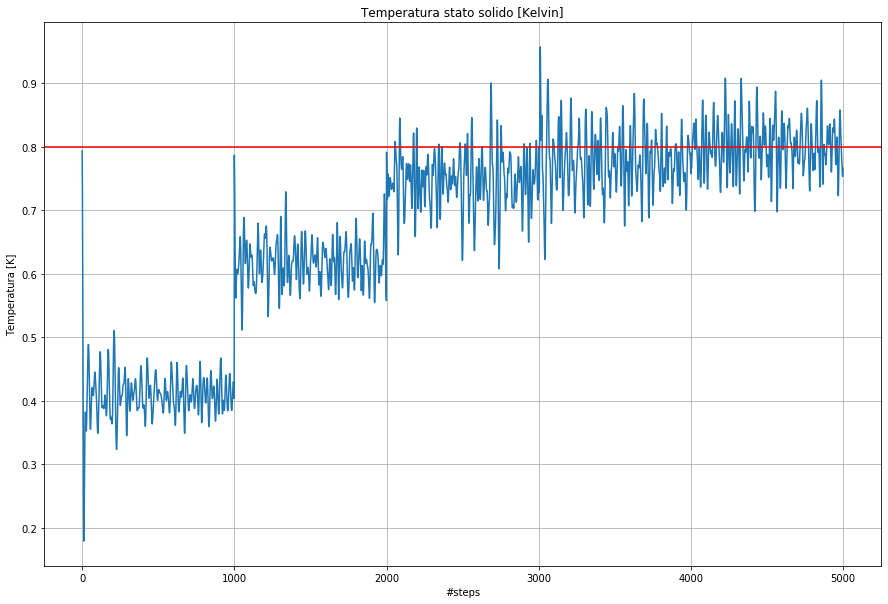

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [15,10]
y = np.loadtxt("ex04.1/solido_equilibrio/output_temp.dat", usecols=(0), delimiter=' ', unpack='true')
plt.plot(y)
plt.xlabel('#steps')
plt.ylabel('Temperatura [K]')
plt.title('Temperatura stato solido [Kelvin]')
plt.grid(True)
plt.axhline(y=0.8,color='red')
plt.show()


Il grafico riportato sopra mostra l'andamento della temperatura in Kelvin per lo stato solido: all'inizio della prima simulazione la temperatura scende da T=0,8 K a T=0,15 K quasi subito, a causa dell'equipartizione dell'energia. 
Si nota che dopo aver forzato il sistema a ripartire (#step=1000) lo costringiamo a tornare al valore di T=0,8 K circa.
Dopo 3 o 4 ripetizioni della simulazione, la temperatura si stabilizza attorno al valore di T=0,8  K cosìcchè il sitema è equilibrato. I valori di temperatura ogni 1000 steps, dopo l'equilibratura, oscillano vicino al valore della temperatura di equilibrio: T*=0,8 K.

#### Energia

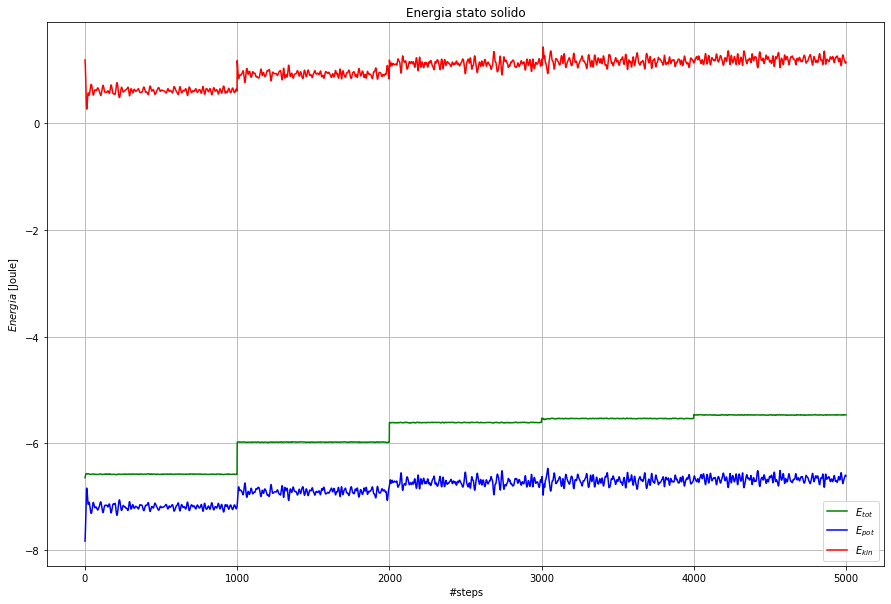

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [15, 10]
Etot = np.loadtxt("ex04.1/solido_equilibrio/output_etot.dat", usecols=(0), delimiter=' ', unpack='true')
Epot = np.loadtxt("ex04.1/solido_equilibrio/output_epot.dat", usecols=(0), delimiter=' ', unpack='true')
Ekin = np.loadtxt("ex04.1/solido_equilibrio/output_ekin.dat", usecols=(0), delimiter=' ', unpack='true')
plt.plot(Etot, 'green')
plt.plot(Epot, 'blue')
plt.plot(Ekin, 'red')
plt.xlabel('#steps')
plt.ylabel('$Energia$ [Joule]')
plt.title('Energia stato solido')
plt.legend( ['$E_{tot}$', '$E_{pot}$', '$E_{kin}$'])
plt.grid(True)
plt.show()

Si nota l'importanza della fase di equilibratura, non solo per il valore della temperatura, ma anche osservando i valori istantanei di energia cinetica, potenziale e totale del sistema.

### Stato liquido
#### Temperatura 

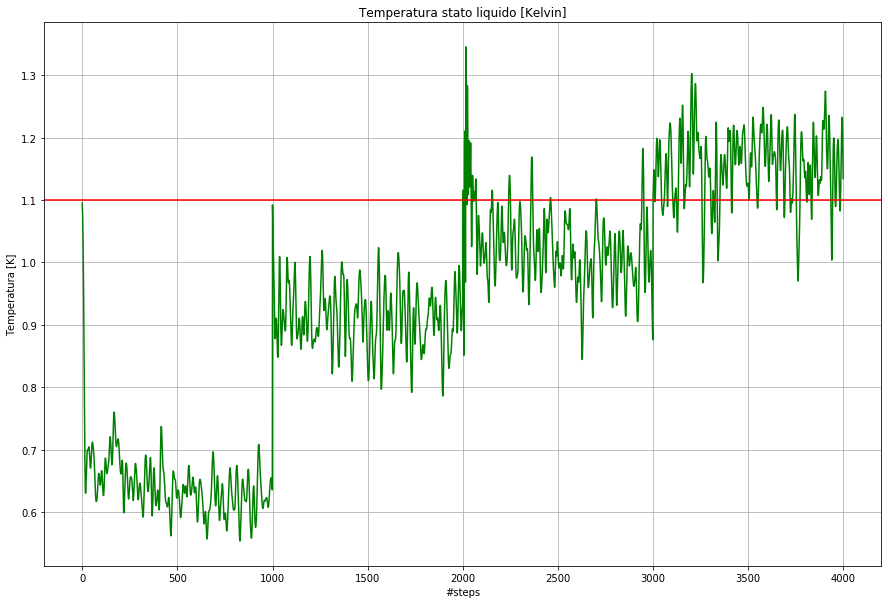

In [10]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [15,10]
y = np.loadtxt("ex04.1/liquido_equilibrio/output_temp.dat", usecols=(0),delimiter=' ',unpack='true')
plt.plot(y, color='green')
plt.xlabel('#steps')
plt.ylabel('Temperatura [K]')
plt.title('Temperatura stato liquido [Kelvin]')
plt.grid(True)
plt.axhline(y=1.1,color='red')
plt.show()


Il grafico riportato sopra mostra l'andamento della temperatura in Kelvin per lo stato liquido: all'inizio della prima simulazione la temperatura scende da T=1,1 K a T=0,6 K quasi subito, a causa dell'equipartizione dell'energia. 
Si nota che dopo aver forzato il sistema a ripartire (#step=1000) lo costringiamo a tornare al valore di T=1,1 K circa.
Dopo 2 o 3 ripetizioni della simulazione, la temperatura si stabilizza attorno al valore di T=1,1  K cosìcchè il sitema è equilibrato. I valori di temperatura ogni 1000 steps, dopo l'equilibratura, oscillano vicino al valore della temperatura di equilibrio: T*=1,1 K.

#### Energia

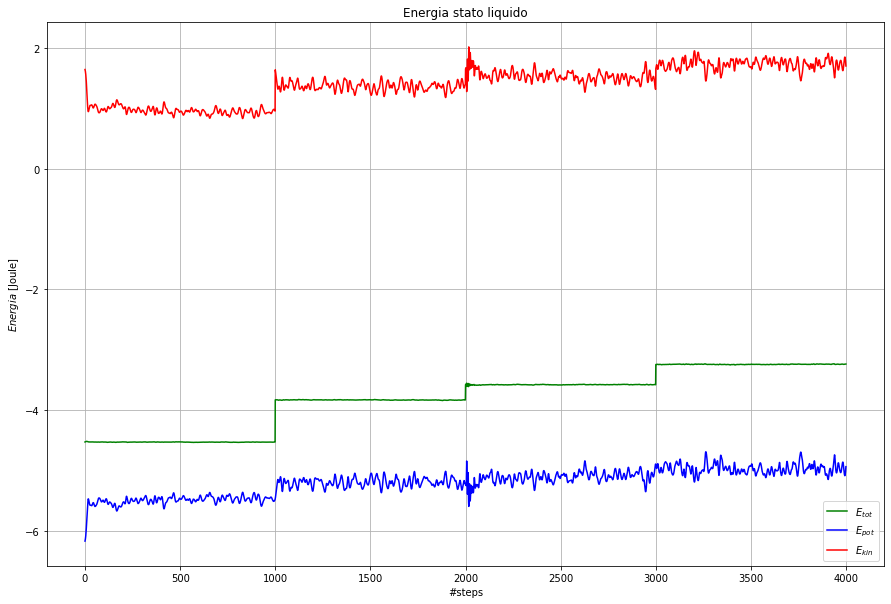

In [11]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [15, 10]
Etot = np.loadtxt("ex04.1/liquido_equilibrio/output_etot.dat", usecols=(0), delimiter=' ', unpack='true')
Epot = np.loadtxt("ex04.1/liquido_equilibrio/output_epot.dat", usecols=(0), delimiter=' ', unpack='true')
Ekin = np.loadtxt("ex04.1/liquido_equilibrio/output_ekin.dat", usecols=(0), delimiter=' ', unpack='true')
plt.plot(Etot, 'green')
plt.plot(Epot, 'blue')
plt.plot(Ekin, 'red')
plt.xlabel('#steps')
plt.ylabel('$Energia$ [Joule]')
plt.title('Energia stato liquido')
plt.legend( ['$E_{tot}$', '$E_{pot}$', '$E_{kin}$'])
plt.grid(True)
plt.show()

## <span style="color:blue"> Esercizio 4.2</span>
### Scopo
In questa seconda parte, dovremmo implementare la "media a blocchi" per calcolare i valori medi di temperatura, energia potenziale, energia cinetica ed energia totale.
Il metodo della "media a blocchi" è utile se si vogliono calcolare i valori medi di un set di dati in cui le misure sono correlate tra loro. Se le misure sono correlate, le ipotesi del Teorema del limite centrale non sono soddisfatte, quindi non possiamo calcolare l'incertezza sul valore medio come $\sigma_{M} = \frac{\sigma}{\sqrt{N}} $ dove $\sigma_M$ è l'errore sul valor medio e $\sigma$ l'RMS. Per risolvere questo problema possiamo procedere seguendo due strade: 

1) Calcolare le proprietà del sistema ogni $n$ steps, i valori che otteniamo quindi, sono scorrelati e possiamo così adoperare il Teorrema del Limite Centrale.

2) Utilizzare il metodo della "media a blocchi": si calcola la media degli $m$ valori, i valori medi che otteniamo da ciascun blocco sono scorrelati l'uno dall'altro, quindi possiamo usare il CLT.

In questo caso particolare, utilizzeremo un mix di entrambe le tecniche esposte sopra: misureremo le proprietà del sistema ogni 10 steps, e divideremo i 10 000 steps in 100 blocchi. In questo modo eseguiremo 1 000 misure divise in 100 blocchi, cosicchè ogni blocco contiene 10 valori. Procedendo in questo modo possiamo essere quasi certi che i valori ottenuti soddisfino l'ipotesi del CLT. 

Di seguito sono riportati i valori istantanei in funzione degli #steps e il valore medio in funzione dei #blocchi per temperatura, energia potenziale, energia cinetica ed energia totale.
### Temperatura stato solido

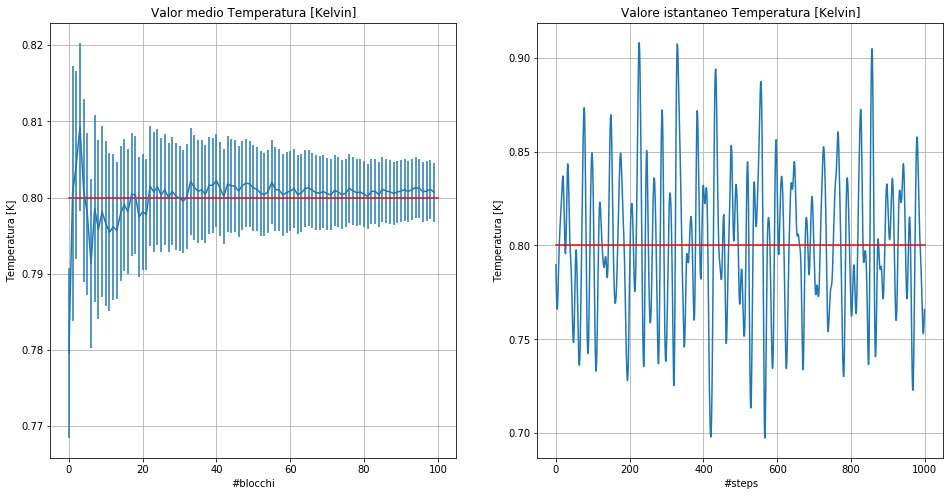

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [16, 8]
fig, ax = plt.subplots(1,2)

x1,y1,yerr1= np.loadtxt("ex04.1/risultati_solido/output_temp_ave.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
y2 = np.loadtxt("ex04.1/risultati_solido/output_temp.dat", usecols=(0), delimiter=' ', unpack='true')
ax[1].plot(y2)
ax[0].errorbar(x1, y1,yerr1)
ax[0].set_xlabel('#blocchi')
ax[0].set_ylabel('Temperatura [K]')
ax[0].set_title('Valor medio Temperatura [Kelvin]')
ax[1].set_xlabel('#steps')
ax[1].set_ylabel('Temperatura [K]')
ax[1].set_title('Valore istantaneo Temperatura [Kelvin]')
ax[0].grid(True)
ax[1].grid(True)
ax[0].plot([0,100],[0.8, 0.8], color='red', linestyle='-', linewidth=1.5)
ax[1].plot([0, 1000], [0.8, 0.8], color='red', linestyle='-', linewidth=1.5)
plt.show()

Il valor medio della Temperatura per la fase solida è compatibile con il valore d'aspettazione T=0,8 K.

### Energia Potenziale stato solido

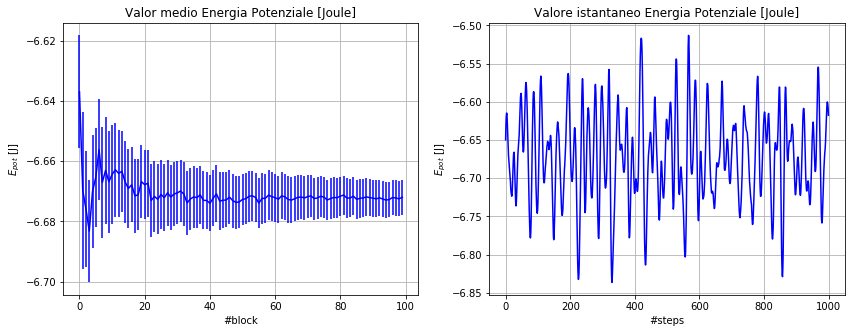

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [14, 5]
fig, ax = plt.subplots(1,2)

x1,y1,yerr1 = np.loadtxt("ex04.1/risultati_solido/output_epot_ave.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
y2 = np.loadtxt("ex04.1/risultati_solido/output_epot.dat", usecols=(0), delimiter=' ', unpack='true')
ax[1].plot(y2, color='blue')
ax[0].errorbar(x1, y1 ,yerr1, color= 'blue')
ax[0].set_xlabel('#block')
ax[0].set_ylabel('$E_{pot}$ [J]')
ax[0].set_title('Valor medio Energia Potenziale [Joule]')
ax[1].set_xlabel('#steps')
ax[1].set_ylabel('$E_{pot}$ [J]')
ax[1].set_title('Valore istantaneo Energia Potenziale [Joule]')
ax[0].grid(True)
ax[1].grid(True)
plt.show()

### Energia Cinetica stato solido

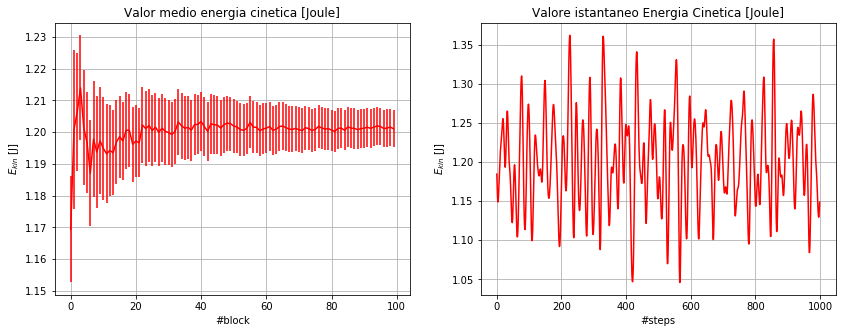

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [14, 5]
fig, ax = plt.subplots(1,2)

x1,y1,yerr1 = np.loadtxt("ex04.1/risultati_solido/output_ekin_ave.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
y2 = np.loadtxt("ex04.1/risultati_solido/output_ekin.dat", usecols=(0), delimiter=' ', unpack='true')
ax[1].plot(y2, color='red')
ax[0].errorbar(x1, y1 ,yerr1, color= 'red')
ax[0].set_xlabel('#block')
ax[0].set_ylabel('$E_{kin}$ [J]')
ax[0].set_title('Valor medio energia cinetica [Joule]')
ax[1].set_xlabel('#steps')
ax[1].set_ylabel('$E_{kin}$ [J]')
ax[1].set_title('Valore istantaneo Energia Cinetica [Joule]')
ax[0].grid(True)
ax[1].grid(True)
plt.show()

### Energia totale stato solido

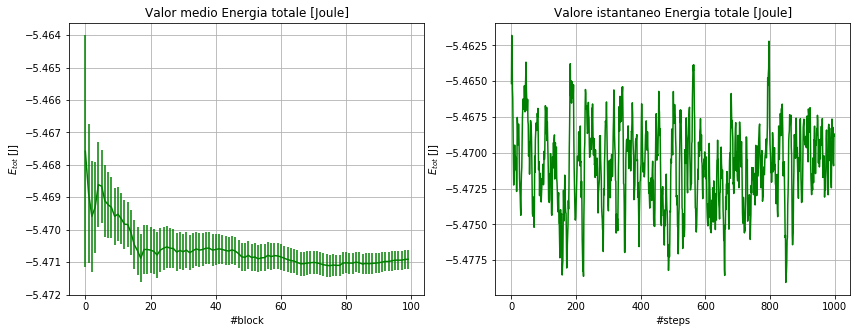

In [7]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [14, 5]
fig, ax = plt.subplots(1,2)

x1,y1,yerr1 = np.loadtxt("ex04.1/risultati_solido/output_etot_ave.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
y2 = np.loadtxt("ex04.1/risultati_solido/output_etot.dat", usecols=(0), delimiter=' ', unpack='true')
ax[1].plot(y2, color='green')
ax[0].errorbar(x1, y1 ,yerr1, color= 'green')
ax[0].set_xlabel('#block')
ax[0].set_ylabel('$E_{tot}$ [J]')
ax[0].set_title('Valor medio Energia totale [Joule]')
ax[1].set_xlabel('#steps')
ax[1].set_ylabel('$E_{tot}$ [J]')
ax[1].set_title('Valore istantaneo Energia totale [Joule]')
ax[0].grid(True)
ax[1].grid(True)
plt.show()

Si osserva che l'energia totale del sistema ha un'oscillazione di circa 1 ordine di grandezza inferiore a quella potenziale e cinetica, in quanto l'energia deve conservarsi.

### Stato liquido
#### Temperatura

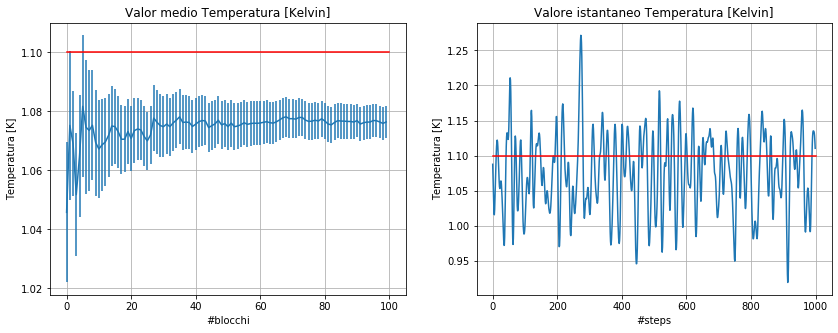

In [12]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [14, 5]
fig, ax = plt.subplots(1,2)

x1,y1,yerr1= np.loadtxt("ex04.1/risultati_liquido/output_temp_ave.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
y2 = np.loadtxt("ex04.1/risultati_liquido/output_temp.dat", usecols=(0), delimiter=' ', unpack='true')
ax[1].plot(y2)
ax[0].errorbar(x1, y1,yerr1)
ax[0].set_xlabel('#blocchi')
ax[0].set_ylabel('Temperatura [K]')
ax[0].set_title('Valor medio Temperatura [Kelvin]')
ax[1].set_xlabel('#steps')
ax[1].set_ylabel('Temperatura [K]')
ax[1].set_title('Valore istantaneo Temperatura [Kelvin]')
ax[0].grid(True)
ax[1].grid(True)
ax[0].plot([0,100],[1.1, 1.1], color='red', linestyle='-', linewidth=1.5)
ax[1].plot([0, 1000], [1.1, 1.1], color='red', linestyle='-', linewidth=1.5)
plt.show()

Il valor medio della temperatura per lo stato liquido non è compatibile con T=1,1 K che è il valore di aspettazione, molto probabilmente perchè mi occorre ripetere la simulazione ancora una volta per poter raggiungere il valore a cui la temperatura si stabilizza e il istema è equilibrato. 

#### Energia Potenziale

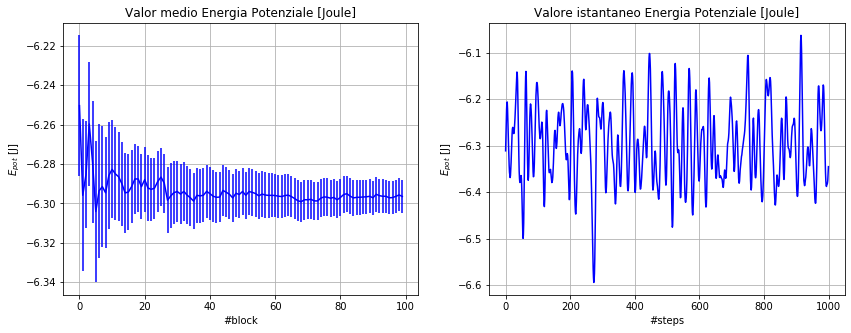

In [13]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [14, 5]
fig, ax = plt.subplots(1,2)

x1,y1,yerr1 = np.loadtxt("ex04.1/risultati_liquido/output_epot_ave.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
y2 = np.loadtxt("ex04.1/risultati_liquido/output_epot.dat", usecols=(0), delimiter=' ', unpack='true')
ax[1].plot(y2, color='blue')
ax[0].errorbar(x1, y1 ,yerr1, color= 'blue')
ax[0].set_xlabel('#block')
ax[0].set_ylabel('$E_{pot}$ [J]')
ax[0].set_title('Valor medio Energia Potenziale [Joule]')
ax[1].set_xlabel('#steps')
ax[1].set_ylabel('$E_{pot}$ [J]')
ax[1].set_title('Valore istantaneo Energia Potenziale [Joule]')
ax[0].grid(True)
ax[1].grid(True)
plt.show()

#### Energia cinetica

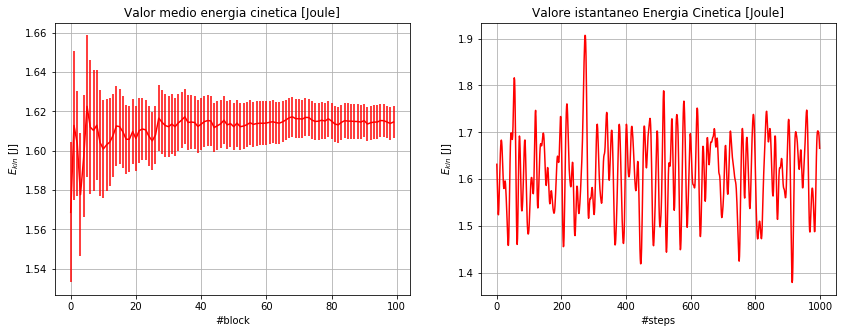

In [14]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [14, 5]
fig, ax = plt.subplots(1,2)

x1,y1,yerr1 = np.loadtxt("ex04.1/risultati_liquido/output_ekin_ave.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
y2 = np.loadtxt("ex04.1/risultati_liquido/output_ekin.dat", usecols=(0), delimiter=' ', unpack='true')
ax[1].plot(y2, color='red')
ax[0].errorbar(x1, y1 ,yerr1, color= 'red')
ax[0].set_xlabel('#block')
ax[0].set_ylabel('$E_{kin}$ [J]')
ax[0].set_title('Valor medio energia cinetica [Joule]')
ax[1].set_xlabel('#steps')
ax[1].set_ylabel('$E_{kin}$ [J]')
ax[1].set_title('Valore istantaneo Energia Cinetica [Joule]')
ax[0].grid(True)
ax[1].grid(True)
plt.show()

#### Energia totale

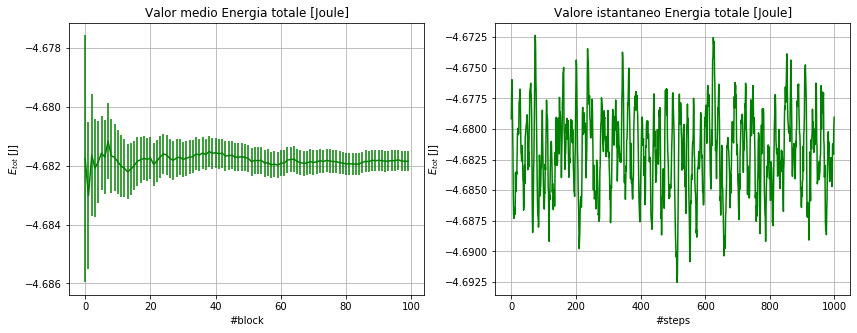

In [15]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [14, 5]
fig, ax = plt.subplots(1,2)

x1,y1,yerr1 = np.loadtxt("ex04.1/risultati_liquido/output_etot_ave.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
y2 = np.loadtxt("ex04.1/risultati_liquido/output_etot.dat", usecols=(0), delimiter=' ', unpack='true')
ax[1].plot(y2, color='green')
ax[0].errorbar(x1, y1 ,yerr1, color= 'green')
ax[0].set_xlabel('#block')
ax[0].set_ylabel('$E_{tot}$ [J]')
ax[0].set_title('Valor medio Energia totale [Joule]')
ax[1].set_xlabel('#steps')
ax[1].set_ylabel('$E_{tot}$ [J]')
ax[1].set_title('Valore istantaneo Energia totale [Joule]')
ax[0].grid(True)
ax[1].grid(True)
plt.show()

Si osserva che l'energia totale del sistema ha un'oscillazione di circa 2 ordini di grandezza inferiore a quella potenziale e cinetica, in quanto l'energia deve conservarsi.

## <span style="color:blue"> Esercizio 4.3</span>
### Scopo

In questa parte dell'esercizio 4, abbiamo dovuto utilizzare il nostro codice MD aggiornato, per equilibrare ed eseguire simulazioni MD tramite un modello Lennard-Jones dell' Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu), nelle seguenti condizioni:
1. fase solida: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off raggio: $r_c = 2.2$)
2. fase liquida: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off raggio: $r_c = 2.5$)
3. fase gassosa: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off raggio: $r_c = 5.0$)

e mostrare nei grafici sottostanti i valori medi ottenuti e le incertezze relativi all'energia totale (interna) per particella, $E/N$, all'energia potenziale per particella, $U/N$, all'energia cinetica per particella, $K/N$, alla pressione $P$ e alla temperatura, $T$ in unità del SI (Sistema internazionale).

Per riottenere unità nel SI a partire da quelle ridotte procediamo nel seguente modo:

$$ T = \frac{\epsilon T^* }{k_B}, \qquad p = \frac{\epsilon p^*}{\sigma^3}, \qquad E_{pot}= \epsilon E_{pot}^* , \qquad E_{tot}= \epsilon E_{tot}^* , \qquad E_{kin}= \epsilon E_{kin}^* $$

dove, con il simbolo asterisco, $^*$ indichiamo le unità ridotte. 

Procediamo con questo calcolo direttamente in python, senza modificare il codice MD.

I parametri per tornare alle unità SI per l'Argon sono:
- $\sigma = 0.34$ nm, 
- $\epsilon/k_B = 120$ K,
- $m=39.948$ amu

### Fase solida 

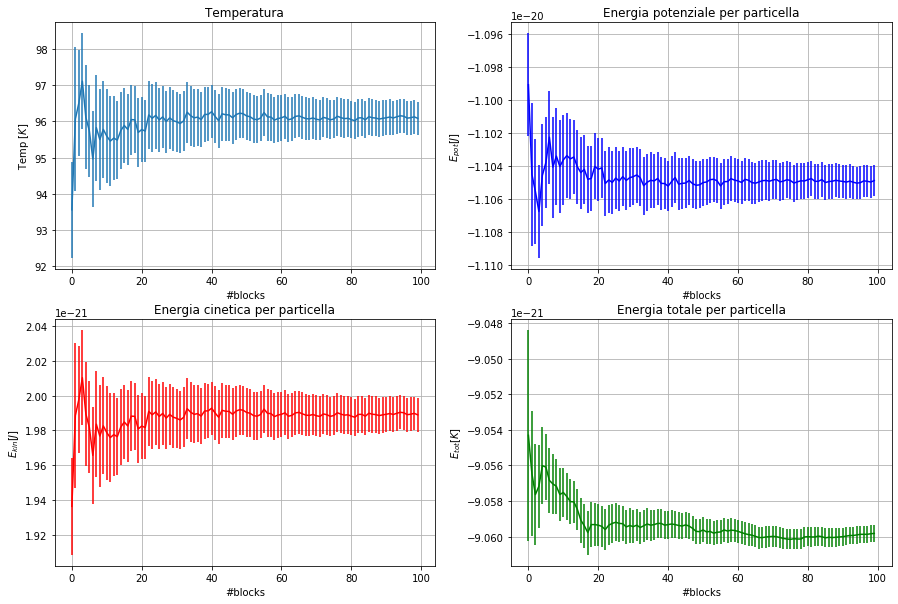

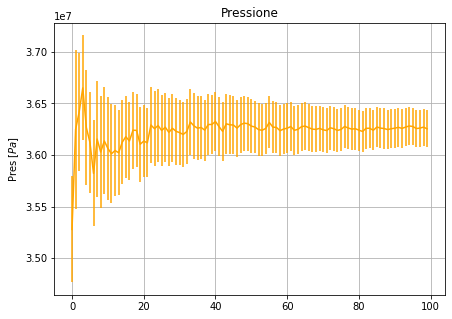

=============== ARGON ===============

Temperatura =  96.21492 ± 0.6821256  K
Energia Potenziale =  -1.105138224e-20 ± 1.42872228e-23  J
Energia cinetica =  1.9916546400000003e-21 ± 1.411999992e-23  J
Energia totale =  -9.059727600000002e-21 ± 7.115765759999999e-25  J
Pressione =  36303704.6611032 ± 262344.7974760838  Pa


In [8]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss

plt.rcParams['figure.figsize'] = [15, 10]
fig, ax = plt.subplots(2,2)

xp,yp,yerrp = np.loadtxt("ex04.1/risultati_solido/output_press_ave.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
xep,yep,yerrep = np.loadtxt("ex04.1/risultati_solido/output_epot_ave.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
xet,yet,yerret = np.loadtxt("ex04.1/risultati_solido/output_etot_ave.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
xek,yek,yerrek = np.loadtxt("ex04.1/risultati_solido/output_ekin_ave.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
xt,yt,yerrt = np.loadtxt("ex04.1/risultati_solido/output_temp_ave.dat", usecols=(0,1,2), delimiter=' ', unpack='true')

#SI units
eps_kb_arg = 120.0
sigma_arg = 0.34E-9
kb = 1.38E-23
eps_arg = eps_kb_arg * kb
#temperature
yt *= eps_kb_arg
yerrt *= eps_kb_arg

#pot en
yep *= eps_arg
yerrep *= eps_arg

#kin en
yek *= eps_arg
yerrek *= eps_arg

#tot en
yet *= eps_arg
yerret *= eps_arg

#pressure
yp *= (eps_arg)/(sigma_arg*sigma_arg*sigma_arg)
yerrp *= (eps_arg)/(sigma_arg*sigma_arg*sigma_arg)

ax[0][0].errorbar(xt, yt ,yerrt)
ax[0][1].errorbar(xep, yep ,yerrep, color = 'blue')
ax[1][0].errorbar(xek, yek ,yerrek, color = 'red')
ax[1][1].errorbar(xet, yet ,yerret, color ='green')

for i in range(2):
    for j in range (2):
        ax[i][j].set_xlabel('#blocks')
        ax[i][j].grid(True) 

ax[0][0].set_title('Temperatura')
ax[0][1].set_title('Energia potenziale per particella')
ax[1][0].set_title('Energia cinetica per particella')
ax[1][1].set_title('Energia totale per particella')


ax[0][0].set_ylabel('Temp $[K]$')
ax[0][1].set_ylabel('$E_{pot} [J]$')
ax[1][0].set_ylabel('$E_{kin} [J]$')
ax[1][1].set_ylabel('$E_{tot} [K]$')

plt.show()

plt.rcParams['figure.figsize'] = [7, 5]
plt.errorbar(xp, yp ,yerrp, color='orange')
plt.title('Pressione')
plt.ylabel('Pres $[Pa]$')
plt.grid(True)
plt.show()

print('=============== ARGON ===============\n')
print('Temperatura = ', yt[49],'±',yerrt[49],' K')
print('Energia Potenziale = ', yep[49],'±',yerrep[49],' J')
print('Energia cinetica = ', yek[49],'±',yerrek[49],' J')
print('Energia totale = ', yet[49],'±',yerret[49],' J')
print('Pressione = ', yp[49],'±',yerrp[49],' Pa')

I valori corretti per $T, E_{pot}/N, E_{kin}/N, E_{tot}/N, p$ sono riportati sopra con l'incertezza associata per l'Argon. 
#### Fase liquida

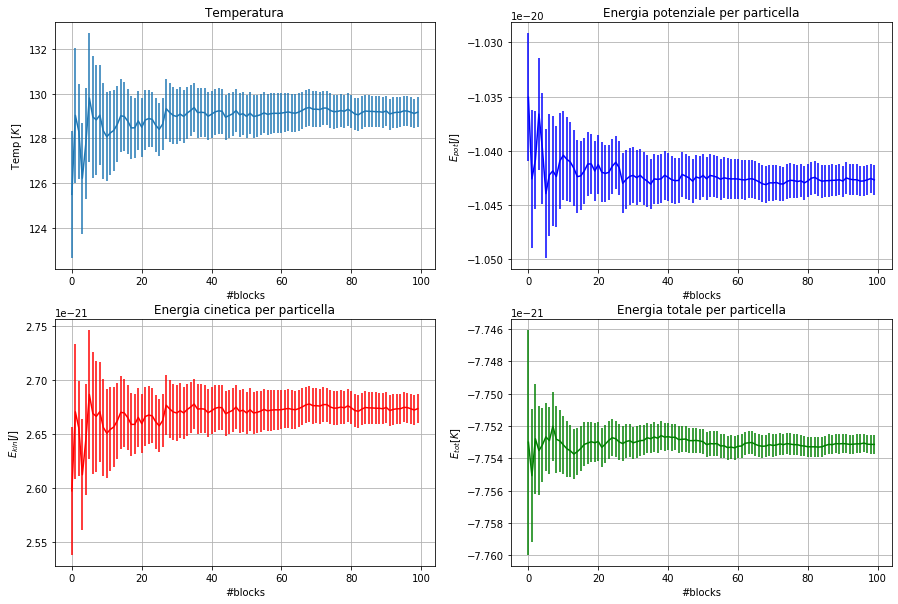

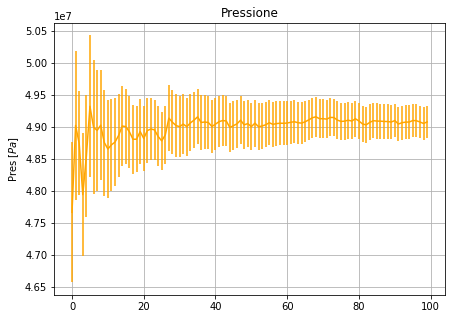

=============== ARGON ===============

Temperatura =  129.10320000000002 ± 0.9614796  K
Energia Potenziale =  -1.042536456e-20 ± 2.00187216e-23  J
Energia cinetica =  2.67243624e-21 ± 1.9902636e-23  J
Energia totale =  -7.752928320000001e-21 ± 7.6574268e-25  J
Pressione =  49054323.224099316 ± 369792.6704661103  Pa


In [16]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss

plt.rcParams['figure.figsize'] = [15, 10]
fig, ax = plt.subplots(2,2)

xp,yp,yerrp = np.loadtxt("ex04.1/risultati_liquido/output_press_ave.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
xep,yep,yerrep = np.loadtxt("ex04.1/risultati_liquido/output_epot_ave.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
xet,yet,yerret = np.loadtxt("ex04.1/risultati_liquido/output_etot_ave.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
xek,yek,yerrek = np.loadtxt("ex04.1/risultati_liquido/output_ekin_ave.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
xt,yt,yerrt = np.loadtxt("ex04.1/risultati_liquido/output_temp_ave.dat", usecols=(0,1,2), delimiter=' ', unpack='true')

#SI units
eps_kb_arg = 120.0
sigma_arg = 0.34E-9
kb = 1.38E-23
eps_arg = eps_kb_arg * kb
#temperature
yt *= eps_kb_arg
yerrt *= eps_kb_arg

#pot en
yep *= eps_arg
yerrep *= eps_arg

#kin en
yek *= eps_arg
yerrek *= eps_arg

#tot en
yet *= eps_arg
yerret *= eps_arg

#pressure
yp *= (eps_arg)/(sigma_arg*sigma_arg*sigma_arg)
yerrp *= (eps_arg)/(sigma_arg*sigma_arg*sigma_arg)

ax[0][0].errorbar(xt, yt ,yerrt)
ax[0][1].errorbar(xep, yep ,yerrep, color = 'blue')
ax[1][0].errorbar(xek, yek ,yerrek, color = 'red')
ax[1][1].errorbar(xet, yet ,yerret, color ='green')

for i in range(2):
    for j in range (2):
        ax[i][j].set_xlabel('#blocks')
        ax[i][j].grid(True) 

ax[0][0].set_title('Temperatura')
ax[0][1].set_title('Energia potenziale per particella')
ax[1][0].set_title('Energia cinetica per particella')
ax[1][1].set_title('Energia totale per particella')


ax[0][0].set_ylabel('Temp $[K]$')
ax[0][1].set_ylabel('$E_{pot} [J]$')
ax[1][0].set_ylabel('$E_{kin} [J]$')
ax[1][1].set_ylabel('$E_{tot} [K]$')

plt.show()

plt.rcParams['figure.figsize'] = [7, 5]
plt.errorbar(xp, yp ,yerrp, color='orange')
plt.title('Pressione')
plt.ylabel('Pres $[Pa]$')
plt.grid(True)
plt.show()

print('=============== ARGON ===============\n')
print('Temperatura = ', yt[49],'±',yerrt[49],' K')
print('Energia Potenziale = ', yep[49],'±',yerrep[49],' J')
print('Energia cinetica = ', yek[49],'±',yerrek[49],' J')
print('Energia totale = ', yet[49],'±',yerret[49],' J')
print('Pressione = ', yp[49],'±',yerrp[49],' Pa')

### Fase gassosa

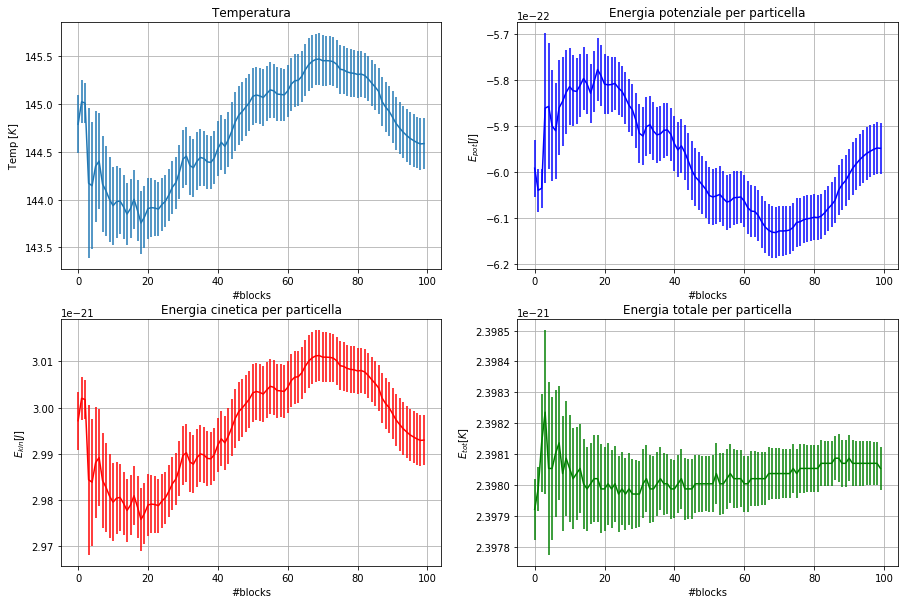

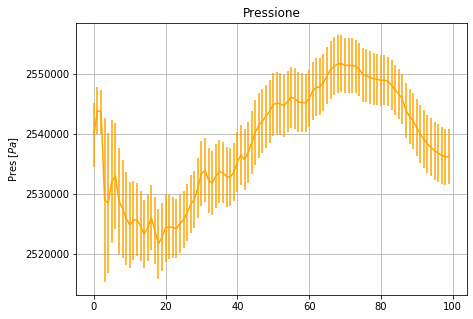

=============== ARGON ===============

Temperatura =  145.01520000000002 ± 0.299838  K
Energia Potenziale =  -6.038239680000001e-22 ± 6.20678736e-24  J
Energia cinetica =  3.0018146399999998e-21 ± 6.2066383200000005e-24  J
Energia totale =  2.3980039200000002e-21 ± 8.941522320000001e-26  J
Pressione =  2543689.985752086 ± 5241.949521677182  Pa


In [19]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss

plt.rcParams['figure.figsize'] = [15, 10]
fig, ax = plt.subplots(2,2)

xp,yp,yerrp = np.loadtxt("ex04.1/risultati_gas/output_press_ave.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
xep,yep,yerrep = np.loadtxt("ex04.1/risultati_gas/output_epot_ave.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
xet,yet,yerret = np.loadtxt("ex04.1/risultati_gas/output_etot_ave.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
xek,yek,yerrek = np.loadtxt("ex04.1/risultati_gas/output_ekin_ave.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
xt,yt,yerrt = np.loadtxt("ex04.1/risultati_gas/output_temp_ave.dat", usecols=(0,1,2), delimiter=' ', unpack='true')

#SI units
eps_kb_arg = 120.0
sigma_arg = 0.34E-9
kb = 1.38E-23
eps_arg = eps_kb_arg * kb
#temperature
yt *= eps_kb_arg
yerrt *= eps_kb_arg

#pot en
yep *= eps_arg
yerrep *= eps_arg

#kin en
yek *= eps_arg
yerrek *= eps_arg

#tot en
yet *= eps_arg
yerret *= eps_arg

#pressure
yp *= (eps_arg)/(sigma_arg*sigma_arg*sigma_arg)
yerrp *= (eps_arg)/(sigma_arg*sigma_arg*sigma_arg)

ax[0][0].errorbar(xt, yt ,yerrt)
ax[0][1].errorbar(xep, yep ,yerrep, color = 'blue')
ax[1][0].errorbar(xek, yek ,yerrek, color = 'red')
ax[1][1].errorbar(xet, yet ,yerret, color ='green')

for i in range(2):
    for j in range (2):
        ax[i][j].set_xlabel('#blocks')
        ax[i][j].grid(True) 

ax[0][0].set_title('Temperatura')
ax[0][1].set_title('Energia potenziale per particella')
ax[1][0].set_title('Energia cinetica per particella')
ax[1][1].set_title('Energia totale per particella')


ax[0][0].set_ylabel('Temp $[K]$')
ax[0][1].set_ylabel('$E_{pot} [J]$')
ax[1][0].set_ylabel('$E_{kin} [J]$')
ax[1][1].set_ylabel('$E_{tot} [K]$')

plt.show()

plt.rcParams['figure.figsize'] = [7, 5]
plt.errorbar(xp, yp ,yerrp, color='orange')
plt.title('Pressione')
plt.ylabel('Pres $[Pa]$')
plt.grid(True)
plt.show()

print('=============== ARGON ===============\n')
print('Temperatura = ', yt[49],'±',yerrt[49],' K')
print('Energia Potenziale = ', yep[49],'±',yerrep[49],' J')
print('Energia cinetica = ', yek[49],'±',yerrek[49],' J')
print('Energia totale = ', yet[49],'±',yerret[49],' J')
print('Pressione = ', yp[49],'±',yerrp[49],' Pa')

Si osserva che nella fase solida le variabili che stiamo considerando presentano oscillazioni meno rilevanti rispetto a quella gassosa, ciò è dovuto alla maggior caoticità della fase gassosa rispetto alla fase solida e liquida.

## <span style="color:blue"> Esercizio 4.3</span>
#### Scopo
Nella seconda parte dell'esercizio abbiamo aggiunto come osservabile la pressione. 

#### Pressione
Si stima la pressione in un sistema di Lennard-Jones tramite il Teorema del Viriale:

$$ P = \rho k_B T + \frac{1}{3V} \left\langle \sum_{i=1}^{N-1} \sum_{j\,(>i)}^N 48\epsilon \left[ \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^{12} - 
\frac{1}{2} \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^6 \right] \right\rangle $$

### Fase solida

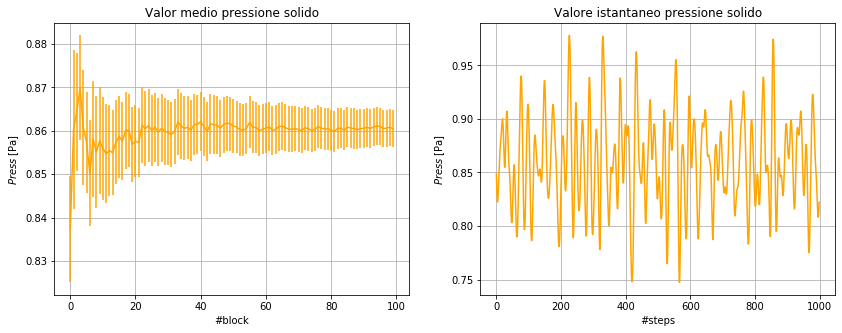

In [9]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [14, 5]
fig, ax = plt.subplots(1,2)

x1,y1,yerr1 = np.loadtxt("ex04.1/risultati_solido/output_press_ave.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
y2 = np.loadtxt("ex04.1/risultati_solido/output_press.dat", usecols=(0), delimiter=' ', unpack='true')
ax[1].plot(y2, color='orange')
ax[0].errorbar(x1, y1 ,yerr1, color= 'orange')
ax[0].set_xlabel('#block')
ax[0].set_ylabel('$Press$ [Pa]')
ax[0].set_title('Valor medio pressione solido')
ax[1].set_xlabel('#steps')
ax[1].set_ylabel('$Press$ [Pa]')
ax[1].set_title('Valore istantaneo pressione solido')
ax[0].grid(True)
ax[1].grid(True)
plt.show()

### Fase liquida

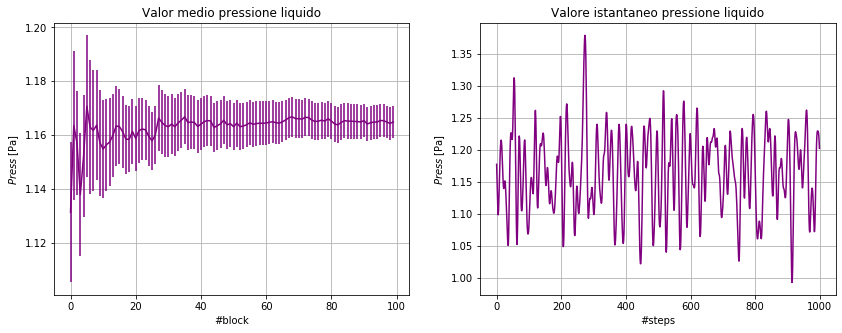

In [17]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [14, 5]
fig, ax = plt.subplots(1,2)

x1,y1,yerr1 = np.loadtxt("ex04.1/risultati_liquido/output_press_ave.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
y2 = np.loadtxt("ex04.1/risultati_liquido/output_press.dat", usecols=(0), delimiter=' ', unpack='true')
ax[1].plot(y2, color='purple')
ax[0].errorbar(x1, y1 ,yerr1, color= 'purple')
ax[0].set_xlabel('#block')
ax[0].set_ylabel('$Press$ [Pa]')
ax[0].set_title('Valor medio pressione liquido')
ax[1].set_xlabel('#steps')
ax[1].set_ylabel('$Press$ [Pa]')
ax[1].set_title('Valore istantaneo pressione liquido')
ax[0].grid(True)
ax[1].grid(True)
plt.show()

### Fase gassosa

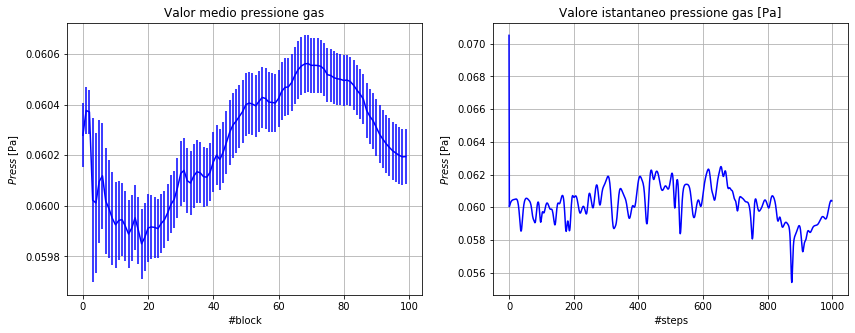

In [18]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [14, 5]
fig, ax = plt.subplots(1,2)

x1,y1,yerr1 = np.loadtxt("ex04.1/risultati_gas/output_press_ave.dat", usecols=(0,1,2) +- delimiter=' ', unpack='true')
y2 = np.loadtxt("ex04.1/risultati_gas/output_press.dat", usecols=(0), delimiter=' ', unpack='true')
ax[1].plot(y2, color='blue')
ax[0].errorbar(x1, y1 ,yerr1, color= 'blue')
ax[0].set_xlabel('#block')
ax[0].set_ylabel('$Press$ [Pa]')
ax[0].set_title('Valor medio pressione gas')
ax[1].set_xlabel('#steps')
ax[1].set_ylabel('$Press$ [Pa]')
ax[1].set_title('Valore istantaneo pressione gas [Pa]')
ax[0].grid(True)
ax[1].grid(True)
plt.show()